In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = 'drive/Shared drives/Predictive Fall 2019/GRevenue data/'

In [4]:
train_df = pd.read_csv(path + 'gtrain_df.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
test_df = pd.read_csv(path + 'gtest_df.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train_df.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,hits,newVisits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactionRevenue,transactions,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,0,4,20171016,3162355547410993243,1508198450,1.0,1.508198e+09,67,0,False,13,951,4,201,27,0,426,15,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,59,3,54456,1,3,3,27,1,2631,5,3196,99
1,1,6,20171016,8934116514970143966,1508176307,6.0,1.508176e+09,58,0,False,17,136,2,133,3,0,454,4,NaN,2.0,NaN,2.0,2.0,28.0,NaN,NaN,NaN,59,3,54456,1,3,3,27,1,1942,6,300,301
2,2,2,20171016,7992466427990357681,1508201613,1.0,1.508202e+09,58,1,True,1,951,2,133,27,34379,426,4,NaN,2.0,1.0,2.0,1.0,38.0,NaN,NaN,NaN,59,3,54456,1,3,3,27,0,1942,0,3196,0
3,3,4,20171016,9075655783635761930,1508169851,1.0,1.508170e+09,58,0,False,13,951,3,125,27,31919,426,14,NaN,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,59,3,54456,1,3,3,27,1,4214,5,3196,99
4,4,4,20171016,6960673291025684308,1508190552,1.0,1.508191e+09,58,0,False,13,951,2,38,27,21354,426,16,NaN,2.0,1.0,2.0,1.0,52.0,NaN,NaN,NaN,59,3,54456,1,3,3,27,1,4214,5,3196,99


In [7]:
test_df.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,hits,newVisits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactionRevenue,transactions,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,0,4,20180511,7460955084541987166,1526099341,2.0,1.526099e+09,25,1,True,1,0,3,86,0,14600,67,18,NaN,4.0,NaN,3.0,1,973.0,NaN,NaN,NaN,0,2,9016,1,2,5,3,0,2,5,0,62
1,1,2,20180511,460252456180441002,1526064483,166.0,1.526064e+09,25,0,False,7,389,2,200,69,0,37,12,NaN,4.0,NaN,3.0,1,49.0,NaN,NaN,NaN,0,2,9016,1,2,5,3,0,3,0,0,0
2,2,4,20180511,3461808543879602873,1526067157,2.0,1.526067e+09,25,0,False,3,502,2,200,81,10224,268,12,NaN,4.0,NaN,3.0,1,24.0,NaN,NaN,NaN,0,2,9016,1,2,5,3,0,2,5,0,62
3,3,2,20180511,975129477712150630,1526107551,4.0,1.526108e+09,25,1,True,21,185,2,200,25,0,235,12,NaN,5.0,NaN,4.0,1,25.0,NaN,NaN,NaN,0,2,9016,1,2,5,3,0,3,0,0,0
4,4,4,20180511,8381672768065729990,1526060254,1.0,1.526060e+09,33,2,True,18,191,2,200,40,2897,37,12,NaN,5.0,1.0,4.0,1,49.0,NaN,NaN,NaN,0,2,9016,1,2,5,3,1,2,5,0,62


In [8]:
train_df.shape

(1708337, 39)

In [0]:
train_df['visitStartTime']= pd.to_datetime(train_df['visitStartTime'],unit = 's')
test_df['visitStartTime']= pd.to_datetime(test_df['visitStartTime'],unit = 's')

In [0]:
# Extracting the time seasonality from the data 

train_df["DayOfWeek"] = train_df['visitStartTime'].dt.dayofweek
test_df["DayOfWeek"] = test_df['visitStartTime'].dt.dayofweek

In [0]:
train_df["month"] = train_df['visitStartTime'].dt.month
test_df["month"] = test_df['visitStartTime'].dt.month

In [0]:
train_df["HourOfDay"] = train_df['visitStartTime'].dt.hour
test_df["HourOfDay"] = test_df['visitStartTime'].dt.hour

In [0]:
train_df.drop(['Unnamed: 0', 'date','visitStartTime'],axis = 1, inplace = True)
test_df.drop(['Unnamed: 0', 'date','visitStartTime'],axis = 1, inplace = True)

In [14]:
#columns with NA values
train_df.columns[train_df.isna().any()].tolist()

['bounces',
 'newVisits',
 'pageviews',
 'sessionQualityDim',
 'timeOnSite',
 'totalTransactionRevenue',
 'transactionRevenue',
 'transactions']

In [15]:
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df = pd.DataFrame({'column_name': train_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
pageviews,pageviews,0.013990
newVisits,newVisits,23.467676
sessionQualityDim,sessionQualityDim,48.893983
bounces,bounces,48.980910
timeOnSite,timeOnSite,51.178076
transactions,transactions,98.913622
transactionRevenue,transactionRevenue,98.916256
totalTransactionRevenue,totalTransactionRevenue,98.916256


In [16]:
percent_missing = test_df.isnull().sum() * 100 / len(test_df)
missing_value_df = pd.DataFrame({'column_name': test_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
pageviews,pageviews,0.025150
newVisits,newVisits,28.766724
timeOnSite,timeOnSite,45.739799
bounces,bounces,54.511204
transactions,transactions,98.429987
transactionRevenue,transactionRevenue,98.856044
totalTransactionRevenue,totalTransactionRevenue,98.856044


In [17]:
train_df.pageviews.unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  20.,  19.,  21.,  23.,
        22.,  26.,  28.,  25.,  31.,  27.,  24.,  29.,  30.,  32.,  33.,
        42.,  38.,  53.,  40.,  62.,  61.,  54.,  60., 111.,  98.,  34.,
        35.,  36.,  37.,  39.,  43.,  45.,  47.,  52.,  44.,  50.,  49.,
        46.,  51.,  56.,  59.,  71.,  57.,  82.,  84.,  92.,  90.,  68.,
       115.,  nan,  41.,  79., 138.,  48.,  69., 112.,  65.,  63.,  58.,
        74., 165., 100.,  85.,  55.,  70.,  80.,  78.,  72., 188.,  73.,
        75.,  86., 197.,  76.,  67., 102., 148.,  64., 103., 144.,  81.,
       119.,  66., 104., 128., 230.,  87., 152., 101.,  94.,  83., 135.,
        91.,  99., 118., 107., 140., 108.,  77., 202., 127.,  93., 106.,
       155., 117.,  89., 143., 105.,  95., 110., 137., 125., 120., 116.,
       208., 126., 400., 333.,  97.,  96., 113., 327., 154., 121., 183.,
       123., 141., 224.,  88., 157., 195., 343., 19

In [18]:
train_df.newVisits.unique()

array([ 1., nan])

In [19]:
train_df.sessionQualityDim.unique()

array([  1.,   2.,   3.,   4.,   6.,   8.,   5.,   7.,  11.,  13.,   9.,
        10.,  49.,  52.,  22.,  54.,  31.,  28.,  60.,  35.,  30.,  32.,
        41.,  19.,  25.,  15.,  24.,  62.,  12.,  14.,  17.,  38.,  63.,
        16.,  23.,  42.,  21.,  18.,  48.,  40.,  73.,  53.,  61.,  36.,
        67.,  47.,  72.,  77.,  58.,  45.,  26.,  75.,  68.,  59.,  43.,
        80.,  46.,  74.,  76.,  66.,  81.,  82.,  70.,  27.,  56.,  50.,
        88.,  39.,  44.,  85.,  55.,  79.,  64.,  93.,  83.,  78.,  86.,
        65.,  69.,  84.,  71.,  51.,  nan,  34.,  20.,  57.,  37.,  29.,
        90.,  87.,  92.,  91.,  96.,  33.,  89.,  94.,  95.,  97.,  99.,
        98., 100.])

In [20]:
train_df.bounces.unique()

array([ 1., nan])

In [21]:
train_df.timeOnSite.unique()

array([  nan,   28.,   38., ..., 4665., 5381., 8811.])

In [0]:
#filling missing values with 0

train_df['bounces'].fillna(0, inplace=True)
test_df['bounces'].fillna(0, inplace=True)

train_df['newVisits'].fillna(0, inplace=True)
test_df['newVisits'].fillna(0, inplace=True)

train_df['transactionRevenue'].fillna(0, inplace=True)
test_df['transactionRevenue'].fillna(0, inplace=True)

In [0]:
# filling with the median as the number of Na is very less 
train_df['pageviews'].fillna(train_df['pageviews'].median(),inplace = True)
test_df['pageviews'].fillna(test_df['pageviews'].median(),inplace = True)

#filling with -999 for high number of NA columns 
train_df['sessionQualityDim'].fillna(-99999,inplace = True)
test_df['sessionQualityDim'].fillna(-99999,inplace = True)

train_df['timeOnSite'].fillna(-99999,inplace = True)
test_df['timeOnSite'].fillna(-99999,inplace = True)

In [24]:
# converting to categorical variables 

from sklearn.preprocessing import LabelEncoder

cat_cols = ["channelGrouping", "browser", 
            "deviceCategory", "operatingSystem", 
            "city", "continent", 
            "country", "metro",
            "networkDomain", "region", 
            "subContinent", "adContent", 
            "adwordsClickInfo.adNetworkType", 
            "adwordsClickInfo.gclId", 
            "adwordsClickInfo.page", "isMobile",
            "adwordsClickInfo.slot", "campaign",
            "keyword", "medium", "HourOfDay",'bounces','newVisits',
            "referralPath", "source","DayOfWeek","month",
            'adwordsClickInfo.isVideoAd', 'isTrueDirect']


for col in cat_cols:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str'))) # + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    
for col in cat_cols:
    print(col)
    lblt = LabelEncoder()
    lblt.fit(list(test_df[col].values.astype('str'))) # + list(test_df[col].values.astype('str')))
    test_df[col] = lblt.transform(list(test_df[col].values.astype('str')))

channelGrouping
browser
deviceCategory
operatingSystem
city
continent
country
metro
networkDomain
region
subContinent
adContent
adwordsClickInfo.adNetworkType
adwordsClickInfo.gclId
adwordsClickInfo.page
isMobile
adwordsClickInfo.slot
campaign
keyword
medium
HourOfDay
bounces
newVisits
referralPath
source
DayOfWeek
month
adwordsClickInfo.isVideoAd
isTrueDirect
channelGrouping
browser
deviceCategory
operatingSystem
city
continent
country
metro
networkDomain
region
subContinent
adContent
adwordsClickInfo.adNetworkType
adwordsClickInfo.gclId
adwordsClickInfo.page
isMobile
adwordsClickInfo.slot
campaign
keyword
medium
HourOfDay
bounces
newVisits
referralPath
source
DayOfWeek
month
adwordsClickInfo.isVideoAd
isTrueDirect


In [0]:
num_cols = ["hits", "pageviews", "visitNumber",'sessionQualityDim','timeOnSite','transactions']   
for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)

In [26]:
train_df.dtypes

channelGrouping                     int64
fullVisitorId                      object
visitId                             int64
visitNumber                       float64
browser                             int64
deviceCategory                      int64
isMobile                            int64
operatingSystem                     int64
city                                int64
continent                           int64
country                             int64
metro                               int64
networkDomain                       int64
region                              int64
subContinent                        int64
bounces                             int64
hits                              float64
newVisits                           int64
pageviews                         float64
sessionQualityDim                 float64
timeOnSite                        float64
totalTransactionRevenue           float64
transactionRevenue                float64
transactions                      

In [27]:
test_df.dtypes

channelGrouping                     int64
fullVisitorId                      object
visitId                             int64
visitNumber                       float64
browser                             int64
deviceCategory                      int64
isMobile                            int64
operatingSystem                     int64
city                                int64
continent                           int64
country                             int64
metro                               int64
networkDomain                       int64
region                              int64
subContinent                        int64
bounces                             int64
hits                              float64
newVisits                           int64
pageviews                         float64
sessionQualityDim                 float64
timeOnSite                        float64
totalTransactionRevenue           float64
transactionRevenue                float64
transactions                      

In [0]:
#creating the label
train_df['label'] = np.where(train_df['transactionRevenue']>0, 1,0)

In [0]:
#split dataset in features and target variable
X = train_df[["channelGrouping", "browser", 
            "deviceCategory", "operatingSystem", 
            "city", "continent", 
            "country", "metro",
            "networkDomain", "region", 
            "subContinent", "adContent", 
            "adwordsClickInfo.adNetworkType", 
            "adwordsClickInfo.gclId", 
            "adwordsClickInfo.page", "isMobile",
            "adwordsClickInfo.slot", "campaign",
            "keyword", "medium", "HourOfDay",'bounces','newVisits',
            "referralPath", "source","DayOfWeek","month",
            'adwordsClickInfo.isVideoAd', 'isTrueDirect',
            "hits", "pageviews", "visitNumber",'sessionQualityDim','timeOnSite']] # Features
# dropping 'fullVisitorId', 'visitId', 'totalTransactionRevenue', 'transactionRevenue', 'transactions', 

y = train_df['label'] # Target variable


In [30]:
X.columns[X.isnull().any()]

Index([], dtype='object')

In [31]:
X.shape

(1708337, 34)

In [32]:
!pip install imblearn

In [33]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [34]:
X_rus.shape

(37028, 34)

In [35]:
y_rus.shape

(37028,)

In [36]:
import collections 
collections.Counter(y_rus)

Counter({0: 18514, 1: 18514})

## Classification Part

In [37]:
# USING THE BEST MODEL TO MAKE THE CLASSIFICATIONS ON THE TEST DATA

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 2000, max_depth = 60, n_jobs = -1, random_state = 42)

# Fit the random search model
rf_classifier.fit(X_rus, y_rus)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=60, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
#creating the ground)truth from the test data
ground_truth = pd.DataFrame()
ground_truth['label'] = np.where(test_df['transactionRevenue']>0, 1,0) # making the same label for the ground truth

In [0]:
test_df_classifier = test_df[X.columns] # Keeping only the columns that was used in the train dataset

In [40]:
#finding the predicted value and calculating the measures 

predicted_classifier = rf_classifier.predict(test_df_classifier)

predicted_classifier[:10] #looking at the first 10 values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import accuracy_score

# Getting the classification report for the fitted model 
print("Prediction Accuracy is ",accuracy_score(ground_truth['label'], predicted_classifier))
print("Classification report is ",classification_report(ground_truth['label'], predicted_classifier))
print("Confusion matrix is ")
print(confusion_matrix(ground_truth['label'], predicted_classifier))


Prediction Accuracy is  0.935436478588806
Classification report is                precision    recall  f1-score   support

           0       1.00      0.94      0.97    396995
           1       0.15      0.95      0.25      4594

    accuracy                           0.94    401589
   macro avg       0.57      0.94      0.61    401589
weighted avg       0.99      0.94      0.96    401589

Confusion matrix is 
[[371303  25692]
 [   236   4358]]


In [0]:
pred_scores = rf_classifier.predict_proba(test_df_classifier)
fpr, tpr, thresh = roc_curve(ground_truth['label'], pred_scores[:,1])

auc_score = auc(fpr, tpr)

In [45]:
auc_score

0.9801031248560863

## Regression Part 

In [0]:
#split dataset in features and target variable
X_r = train_df[["channelGrouping", "browser", 
            "deviceCategory", "operatingSystem", 
            "city", "continent", 
            "country", "metro",
            "networkDomain", "region", 
            "subContinent", "adContent", 
            "adwordsClickInfo.adNetworkType", 
            "adwordsClickInfo.gclId", 
            "adwordsClickInfo.page", "isMobile",
            "adwordsClickInfo.slot", "campaign",
            "keyword", "medium", "HourOfDay",'bounces','newVisits',
            "referralPath", "source","DayOfWeek","month",
            'adwordsClickInfo.isVideoAd', 'isTrueDirect',
            "hits", "pageviews", "visitNumber",'sessionQualityDim','timeOnSite']] # Features
# dropping 'fullVisitorId', 'visitId', 'totalTransactionRevenue', 'transactionRevenue', 'transactions', 

y_r = train_df['transactionRevenue'] # Target variable

In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
Xr_rus, yr_rus, id_rus = rus.fit_sample(X_r, y_r)

In [0]:
Groundtruth_revenue = test_df['transactionRevenue']

In [0]:
test_df_regressor = test_df[X_r.columns]

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state = 42,n_jobs = -1, max_depth = 60, n_estimators = 2000)

# Fit the model
rf_regressor.fit(Xr_rus, yr_rus)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
predicted_reg = rf_regressor.predict(test_df_regressor)

In [52]:
rf_regressor.feature_importances_

array([1.68015305e-02, 1.48747805e-03, 3.66149971e-04, 1.07022401e-02,
       1.70964181e-02, 3.03738166e-03, 4.15079351e-03, 2.69018527e-02,
       3.39538716e-02, 1.74486068e-02, 1.29472218e-03, 2.00496608e-04,
       1.32843590e-04, 8.30241452e-04, 1.84056348e-04, 2.99916974e-04,
       1.25200462e-04, 1.32684688e-04, 3.04286044e-03, 6.29533144e-03,
       6.08963687e-02, 8.98200207e-09, 2.05289310e-03, 3.86048847e-03,
       5.93396666e-03, 4.15586400e-02, 5.70373742e-02, 1.36573672e-04,
       7.30195053e-03, 7.64652392e-02, 6.52198846e-02, 3.61275749e-01,
       4.20601355e-02, 1.31716051e-01])

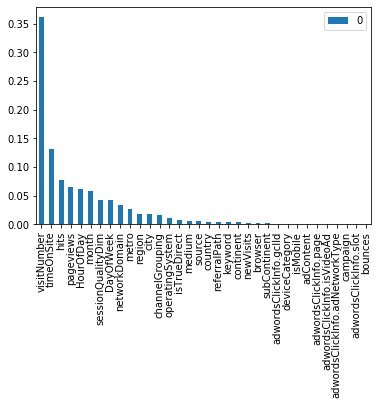

In [53]:
importances = list(zip(rf_regressor.feature_importances_, X_r.columns))
importances.sort(reverse=True)
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Calculating the scores 

In [55]:
# JUST FOR THE REGRESSOR ALONE
from math import sqrt

mse=mean_squared_error(Groundtruth_revenue, predicted_reg)
print("mean square error",mse)
rms = sqrt(mean_squared_error(Groundtruth_revenue, predicted_reg))
print("root mean square error",rms)
mae=mean_absolute_error(Groundtruth_revenue, predicted_reg)
print("mean absolute error",mae)

mean square error 2.111758106893218e+17
root mean square error 459538693.3538043
mean absolute error 382996836.0746061


In [0]:
# multiplying the classifier and the regressor to predict only for those columns which have classified as a transaction
final_regression = predicted_classifier * predicted_reg

In [57]:
# JUST FOR THE CLASSIFIER AND THE REGRESSOR
from math import sqrt

mse=mean_squared_error(Groundtruth_revenue, final_regression)
print("mean square error",mse)
rms = sqrt(mean_squared_error(Groundtruth_revenue, final_regression))
print("root mean square error",rms)
mae=mean_absolute_error(Groundtruth_revenue, final_regression)
print("mean absolute error",mae)

mean square error 1.610382438960799e+16
root mean square error 126900844.71589616
mean absolute error 26055485.260540005


## Rolling up the dataset to customer level 

In [58]:
test_df.columns

Index(['channelGrouping', 'fullVisitorId', 'visitId', 'visitNumber', 'browser',
       'deviceCategory', 'isMobile', 'operatingSystem', 'city', 'continent',
       'country', 'metro', 'networkDomain', 'region', 'subContinent',
       'bounces', 'hits', 'newVisits', 'pageviews', 'sessionQualityDim',
       'timeOnSite', 'totalTransactionRevenue', 'transactionRevenue',
       'transactions', 'adContent', 'adwordsClickInfo.adNetworkType',
       'adwordsClickInfo.gclId', 'adwordsClickInfo.isVideoAd',
       'adwordsClickInfo.page', 'adwordsClickInfo.slot', 'campaign',
       'isTrueDirect', 'keyword', 'medium', 'referralPath', 'source',
       'DayOfWeek', 'month', 'HourOfDay'],
      dtype='object')

In [60]:
visitorid = test_df['fullVisitorId']
visitorid[:10]

0    7460955084541987166
1     460252456180441002
2    3461808543879602873
3     975129477712150630
4    8381672768065729990
5    2866297766347322467
6    2235365487897339889
7    1303090465617023038
8     459669224143241747
9     589440789980446309
Name: fullVisitorId, dtype: object

In [78]:
# creating a data frame for the regression stand alone example 

df_1 = pd.DataFrame({'fullVisitorId':visitorid, 'predicted_revenue':predicted_reg})
print("The head is")
print(df_1.head())


print("___________________________________________________")
visitor_level1 = df_1.groupby('fullVisitorId').mean().reset_index()
print("Visitor level shape is",visitor_level1.shape)
print(visitor_level1.head())

The head is
         fullVisitorId  predicted_revenue
0  7460955084541987166       2.889738e+08
1   460252456180441002       7.529693e+09
2  3461808543879602873       4.038368e+08
3   975129477712150630       6.195092e+08
4  8381672768065729990       2.875788e+08
___________________________________________________
Visitor level shape is (300364, 2)
    fullVisitorId  predicted_revenue
0   1995526696366        262578580.0
1  16367580689231        365253100.0
2  18966949534117        269032185.0
3  24844201502183        306581860.0
4  24845665201193        726850630.0


In [77]:
# Doing the same for the actual ground prediction value 
groundtruth_prediction = test_df.groupby('fullVisitorId').mean()['transactionRevenue'].reset_index()
print(groundtruth_prediction.head())
print("")
print ("Shape is ", groundtruth_prediction.shape)

    fullVisitorId  transactionRevenue
0   1995526696366                 0.0
1  16367580689231                 0.0
2  18966949534117                 0.0
3  24844201502183                 0.0
4  24845665201193                 0.0

Shape is  (300364, 2)


In [82]:
# merging them both 

merge_1 = pd.merge(groundtruth_prediction, visitor_level1, on = 'fullVisitorId')

merge_1.transactionRevenue = np.log(merge_1.transactionRevenue + 1)
merge_1.predicted_revenue = np.log(merge_1.predicted_revenue +1 )
merge_1.head()

,fullVisitorId,transactionRevenue,predicted_revenue
0,1995526696366,0.0,19.386061
1,16367580689231,0.0,19.716101
2,18966949534117,0.0,19.410342
3,24844201502183,0.0,19.540995
4,24845665201193,0.0,20.404232


In [83]:
mse=mean_squared_error(merge_1.transactionRevenue, merge_1.predicted_revenue)
print("mean square error",mse)
rms = sqrt(mean_squared_error(merge_1.transactionRevenue, merge_1.predicted_revenue))
print("root mean square error",rms)
mae=mean_absolute_error(merge_1.transactionRevenue, merge_1.predicted_revenue)
print("mean absolute error",mae)

mean square error 380.7623844726264
root mean square error 19.513133640515722
mean absolute error 19.409663110449635


In [88]:
# creating a data frame for the Classifier and the regressor model 

df_2 = pd.DataFrame({'fullVisitorId':visitorid, 'final_revenue':final_regression})
print("The head is")
print(df_2.head())
print("")
print("___________________________________________________")
visitor_level2 = df_2.groupby('fullVisitorId').mean().reset_index()
print("Visitor level shape is",visitor_level2.shape)
print(visitor_level2.head())

# merging them both 
print("")
print("___________________________________________________")
merge_2 = pd.merge(groundtruth_prediction, visitor_level2, on = 'fullVisitorId')

merge_2.transactionRevenue = np.log(merge_2.transactionRevenue + 1)
merge_2.final_revenue = np.log(merge_2.final_revenue +1 )
merge_2.head()

The head is
         fullVisitorId  final_revenue
0  7460955084541987166            0.0
1   460252456180441002            0.0
2  3461808543879602873            0.0
3   975129477712150630            0.0
4  8381672768065729990            0.0

___________________________________________________
Visitor level shape is (300364, 2)
    fullVisitorId  final_revenue
0   1995526696366            0.0
1  16367580689231            0.0
2  18966949534117            0.0
3  24844201502183            0.0
4  24845665201193            0.0

___________________________________________________


,fullVisitorId,transactionRevenue,final_revenue
0,1995526696366,0.0,0.0
1,16367580689231,0.0,0.0
2,18966949534117,0.0,0.0
3,24844201502183,0.0,0.0
4,24845665201193,0.0,0.0


In [94]:
mse=mean_squared_error(merge_2.transactionRevenue, merge_2.final_revenue)
print("mean square error",mse)
rms = sqrt(mean_squared_error(merge_2.transactionRevenue, merge_2.final_revenue))
print("root mean square error",rms)
mae=mean_absolute_error(merge_2.transactionRevenue, merge_2.final_revenue)
print("mean absolute error",mae)

merge_2.shape

mean square error 24.670394530559932
root mean square error 4.966930091168984
mean absolute error 1.319528259085261


(300364, 3)

In [102]:
merge_2.to_csv("final_result.csv")
merge_2.head()

,fullVisitorId,transactionRevenue,final_revenue
0,1995526696366,0.0,0.0
1,16367580689231,0.0,0.0
2,18966949534117,0.0,0.0
3,24844201502183,0.0,0.0
4,24845665201193,0.0,0.0


In [92]:
!ls

drive  final_result.csv  sample_data


In [0]:
from google.colab import files
files.download('final_result.csv') 

In [96]:
uploaded = files.upload()

Saving sample_submission_v2.csv to sample_submission_v2.csv


In [97]:
!ls

drive  final_result.csv  sample_data  sample_submission_v2.csv


In [101]:
final_ans = pd.read_csv('sample_submission_v2.csv')
final_ans.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.0
1,0000039738481224681,0.0
2,0000073585230191399,0.0
3,0000087588448856385,0.0
4,0000149787903119437,0.0


In [100]:
final_ans.shape

(296530, 2)

In [0]:
answer = pd.merge(final_ans,merge_2,on='fullVisitorId')

In [104]:
answer.head()

,fullVisitorId,PredictedLogRevenue,transactionRevenue,final_revenue
0,0000196310838896290,0.0,0.0,19.867911
1,0000268499301061358,0.0,0.0,0.000000
2,0000900085223565423,0.0,0.0,0.000000
3,000101445922736554,0.0,0.0,0.000000
4,0001180870711546826,0.0,0.0,0.000000


In [105]:
answer.columns

Index(['fullVisitorId', 'PredictedLogRevenue', 'transactionRevenue',
       'final_revenue'],
      dtype='object')

In [0]:
answer.drop(['PredictedLogRevenue', 'transactionRevenue'],axis = 1 , inplace = True)

In [113]:
answer.columns = ['fullVisitorId', 'PredictedLogRevenue']
answer.shape

(45960, 2)

In [111]:
answer.to_csv("answer.csv")
answer.head()

,fullVisitorId,PredictedLogRevenue
0,0000196310838896290,19.867911
1,0000268499301061358,0.000000
2,0000900085223565423,0.000000
3,000101445922736554,0.000000
4,0001180870711546826,0.000000


In [0]:
files.download('answer.csv') 

In [0]:
#Running light GB model 
import lightgbm as lgb

params = {
    "objective" : "regression",
    "metric" : "rmse", 
    "num_leaves" : 30,
    "min_child_samples" : 100,
    "learning_rate" : 0.1,
    "bagging_fraction" : 0.7,
    "feature_fraction" : 0.5,
    "bagging_frequency" : 5,
    "bagging_seed" : 2018,
    "verbosity" : -1
}

lgtrain = lgb.Dataset(Xr_rus , label=yr_rus)
lgval = lgb.Dataset(test_df_regressor, label= Groundtruth_revenue)

In [123]:
model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

pred_val_y = model.predict(test_df_regressor, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 2.13405e+08
Early stopping, best iteration is:
[16]	valid_0's rmse: 1.93021e+08


In [125]:
pred_val_y

array([1.16938527e+08, 8.33106253e+08, 1.78737835e+08, ...,
       1.83226322e+08, 1.58734114e+08, 1.56439957e+08])

In [126]:
# multiplying the classifier and the regressor to predict only for those columns which have classified as a transaction
lgm_regression = predicted_classifier * pred_val_y

# JUST FOR THE CLASSIFIER AND THE REGRESSOR
from math import sqrt

mse=mean_squared_error(Groundtruth_revenue, lgm_regression)
print("mean square error",mse)
rms = sqrt(mean_squared_error(Groundtruth_revenue, lgm_regression))
print("root mean square error",rms)
mae=mean_absolute_error(Groundtruth_revenue, lgm_regression)
print("mean absolute error",mae)

mean square error 6354443087544600.0
root mean square error 79714760.78835462
mean absolute error 15209533.643929392


In [128]:
# creating a data frame for the Classifier and the regressor model 

df_3 = pd.DataFrame({'fullVisitorId':visitorid, 'lgm_revenue':lgm_regression})
print("The head is")
print(df_3.head())
print("")
print("___________________________________________________")


visitor_level3 = df_3.groupby('fullVisitorId').mean().reset_index()
print("Visitor level shape is",visitor_level3.shape)
print(visitor_level3.head())

# merging them both 
print("")
print("___________________________________________________")
merge_3 = pd.merge(groundtruth_prediction, visitor_level3, on = 'fullVisitorId')

merge_3.transactionRevenue = np.log(merge_3.transactionRevenue + 1)
merge_3.lgm_revenue = np.log(merge_3.lgm_revenue +1 )
merge_3.head()

The head is
         fullVisitorId  lgm_revenue
0  7460955084541987166          0.0
1   460252456180441002          0.0
2  3461808543879602873          0.0
3   975129477712150630          0.0
4  8381672768065729990          0.0

___________________________________________________
Visitor level shape is (300364, 2)
    fullVisitorId  lgm_revenue
0   1995526696366          0.0
1  16367580689231          0.0
2  18966949534117          0.0
3  24844201502183          0.0
4  24845665201193          0.0

___________________________________________________


,fullVisitorId,transactionRevenue,lgm_revenue
0,1995526696366,0.0,0.0
1,16367580689231,0.0,0.0
2,18966949534117,0.0,0.0
3,24844201502183,0.0,0.0
4,24845665201193,0.0,0.0


In [130]:
mse=mean_squared_error(merge_3.transactionRevenue, merge_3.lgm_revenue)
print("mean square error",mse)
rms = sqrt(mean_squared_error(merge_3.transactionRevenue, merge_3.lgm_revenue))
print("root mean square error",rms)
mae=mean_absolute_error(merge_3.transactionRevenue, merge_3.lgm_revenue)
print("mean absolute error",mae)

merge_3.shape

mean square error 23.467225736538985
root mean square error 4.844298270806514
mean absolute error 1.2824130957610764


(300364, 3)

# Random Search CV for finding the best model parameters

In [0]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [0]:
#Test_train_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.30, random_state= 42)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
# min_samples_split = [3, 7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

pprint(random_grid)

{'max_depth': [10, 35, 60, 85, 110, None],
 'n_estimators': [200, 650, 1100, 1550, 2000]}


In [0]:
from sklearn.ensemble import RandomForestClassifier

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42,n_jobs = -1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] n_estimators=200, max_depth=10 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... n_estimators=200, max_depth=10, total=   4.3s
[CV] n_estimators=200, max_depth=10 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] ................... n_estimators=200, max_depth=10, total=   3.9s
[CV] n_estimators=200, max_depth=10 ..................................
[CV] ................... n_estimators=200, max_depth=10, total=   3.9s
[CV] n_estimators=650, max_depth=10 ..................................
[CV] ................... n_estimators=650, max_depth=10, total=   9.2s
[CV] n_estimators=650, max_depth=10 ..................................
[CV] ................... n_estimators=650, max_depth=10, total=   9.2s
[CV] n_estimators=650, max_depth=10 ..................................
[CV] ................... n_estimators=650, max_depth=10, total=   9.2s
[CV] n_estimators=1100, max_depth=10 .................................
[CV] .................. n_estimators=1100, max_depth=10, total=  14.5s
[CV] n_estimators=1100, max_depth=10 .................................
[CV] .................. n_estimators=1100, max_depth=10, total=  14.5s
[CV] n_estimators=1100, max_depth=10 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 26.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [0]:
rf_random.best_params_

{'max_depth': 60, 'n_estimators': 2000}

In [0]:
from sklearn.metrics import classification_report
best_grid = rf_random.best_estimator_

y_true, y_pred = y_test, best_grid.predict(X_test)
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5528
           1       0.95      0.98      0.96      5581

    accuracy                           0.96     11109
   macro avg       0.96      0.96      0.96     11109
weighted avg       0.96      0.96      0.96     11109



In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import accuracy_score

predicted = best_grid.predict(X_test)
# Accuracy, classification report and confusion matrix of the fitted model

print("Prediction Accuracy is ",accuracy_score(y_test, predicted))
print("Classification report is ",classification_report(y_test, predicted))
print("Confusion matrix is ")
print(confusion_matrix(y_test, predicted))

Prediction Accuracy is  0.9633630389774057
Classification report is                precision    recall  f1-score   support

           0       0.98      0.94      0.96      5528
           1       0.95      0.98      0.96      5581

    accuracy                           0.96     11109
   macro avg       0.96      0.96      0.96     11109
weighted avg       0.96      0.96      0.96     11109

Confusion matrix is 
[[5223  305]
 [ 102 5479]]


In [0]:
pred_scores = best_grid.fit(X_train,y_train).predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

In [0]:
auc_score

0.9875489955713397